# Concrete Strength Prediction

#### Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.


Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable


In [852]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pandas_profiling import ProfileReport

%matplotlib inline
warnings.filterwarnings("ignore") 
df = pd.read_csv('concrete.csv')
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [376]:
# I added profile report just to compare with the manual analisis.
profile = ProfileReport(df)
profile

## 1. Univariate analysis
data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates

In [216]:
df.shape

(1030, 9)

In [217]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [218]:
df.isnull().apply(pd.value_counts)  

cement  slag   ash  water  superplastic  coarseagg  fineagg   age  \
False    1030  1030  1030   1030          1030       1030     1030  1030   

       strength  
False      1030

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [220]:
df.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

### Insight
0 values may indicate that the mixture does not have that material so we do not eliminate or impute those values


In [221]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

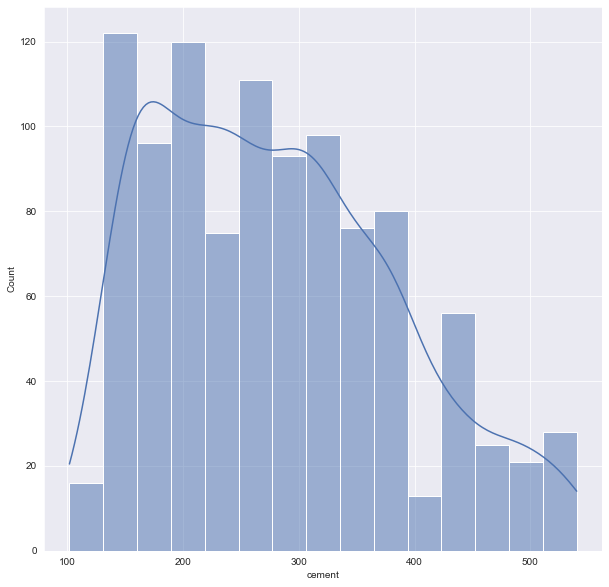

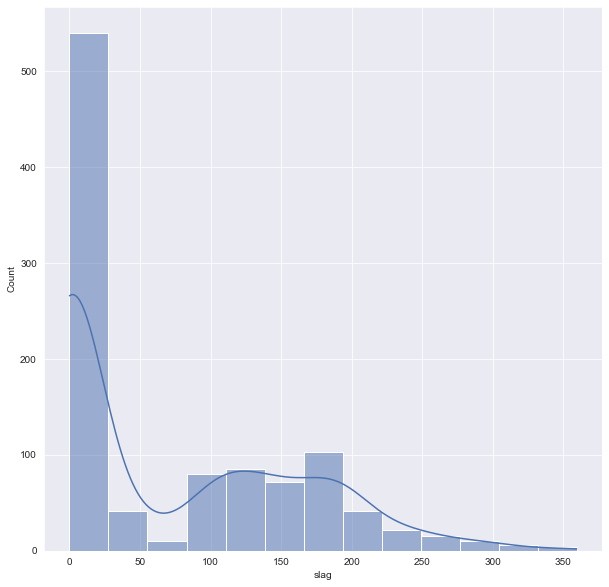

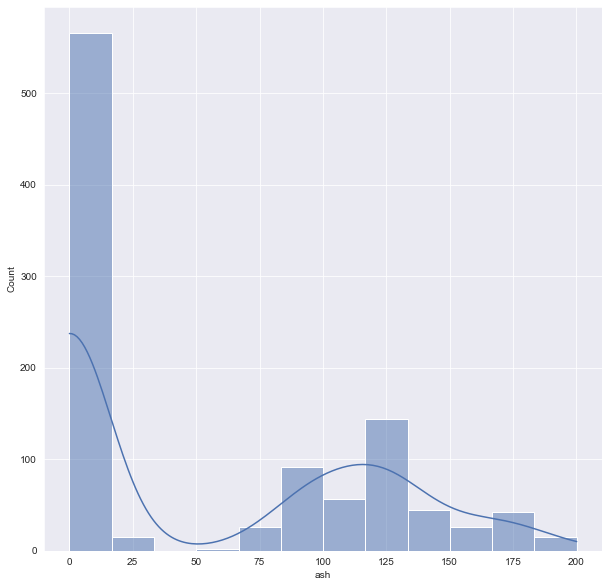

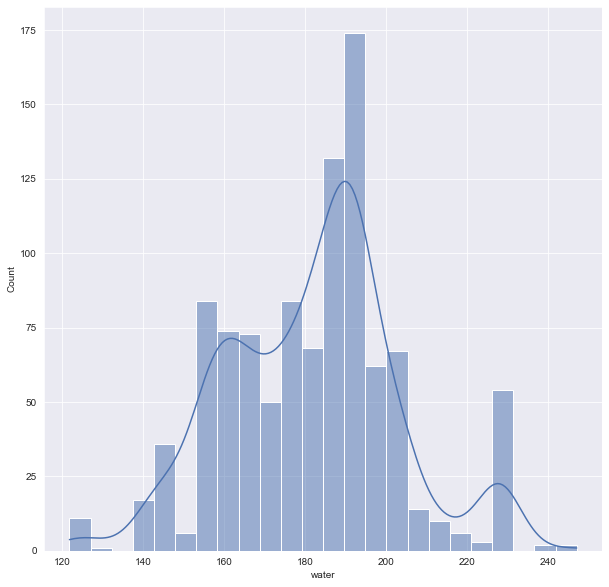

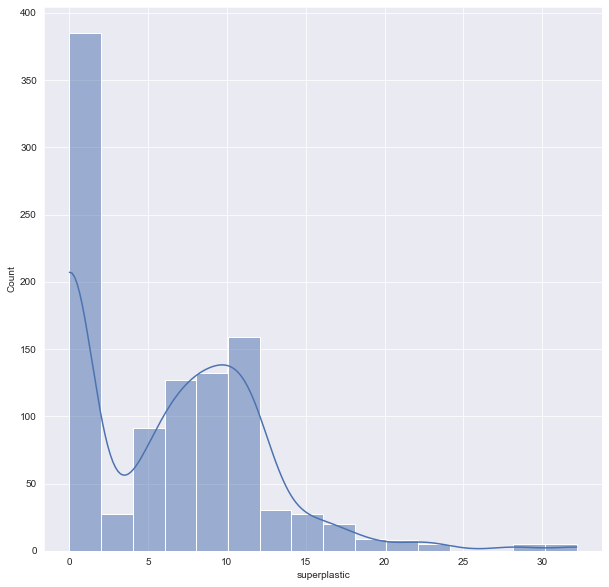

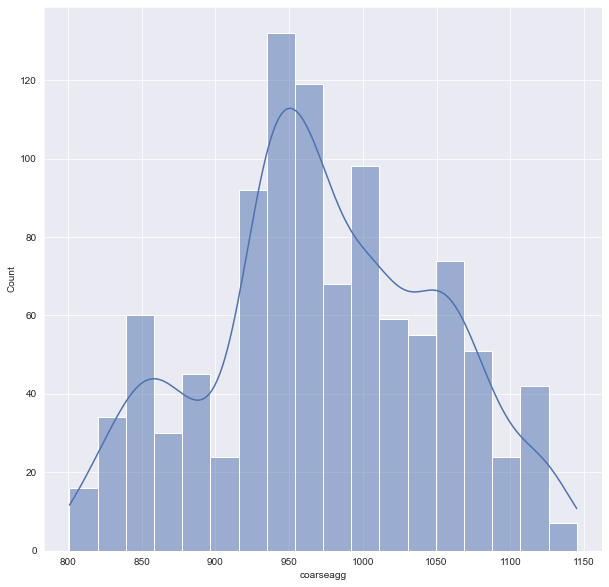

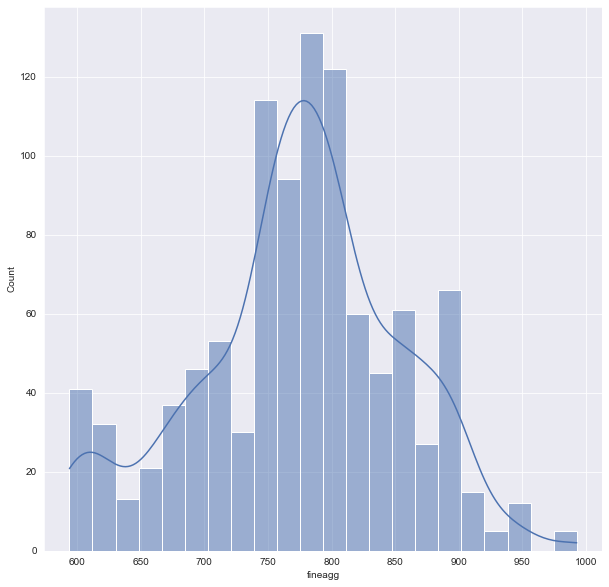

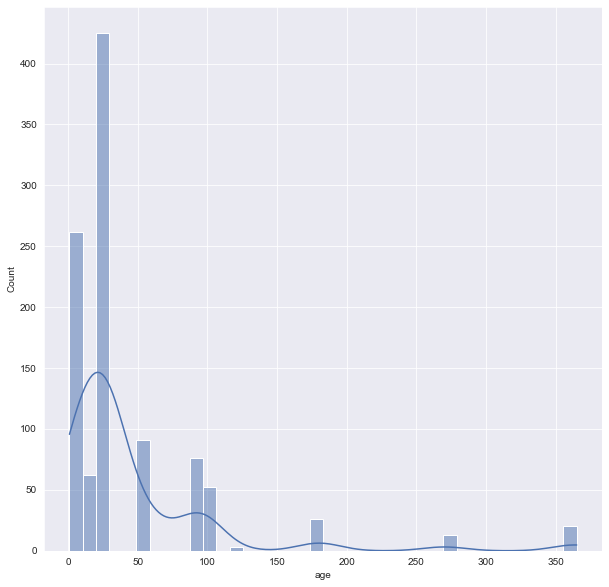

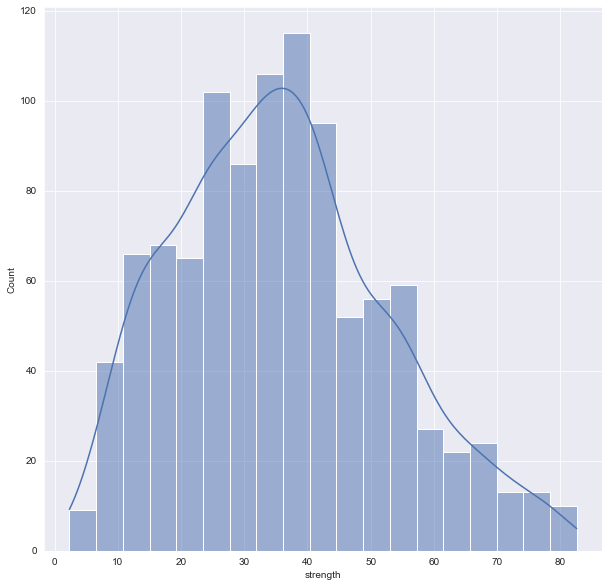

In [222]:
for i in df.columns:
    sns.set({'figure.figsize': (10,10)})
    sns.histplot(df[i], kde=True)
    plt.show()

### Insight: 
There is some components with 0 values. We can attribute them just as a 0 quantities of this material in the mix. I will not drop any value and i will considerate lineal regression for the model.

## 2. Bi-variate 
analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. 

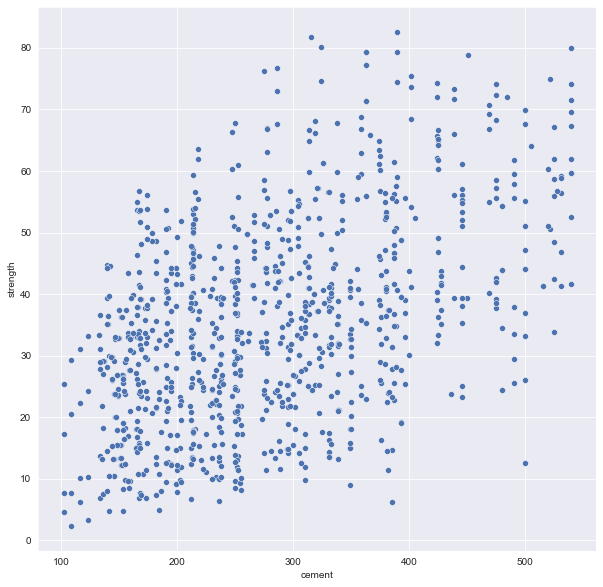

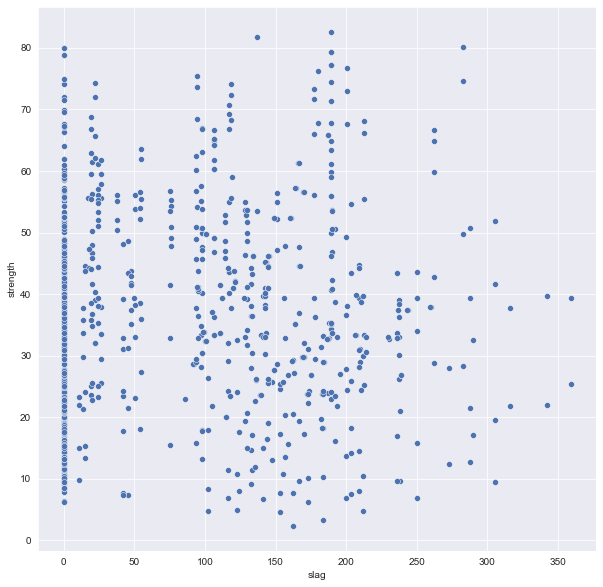

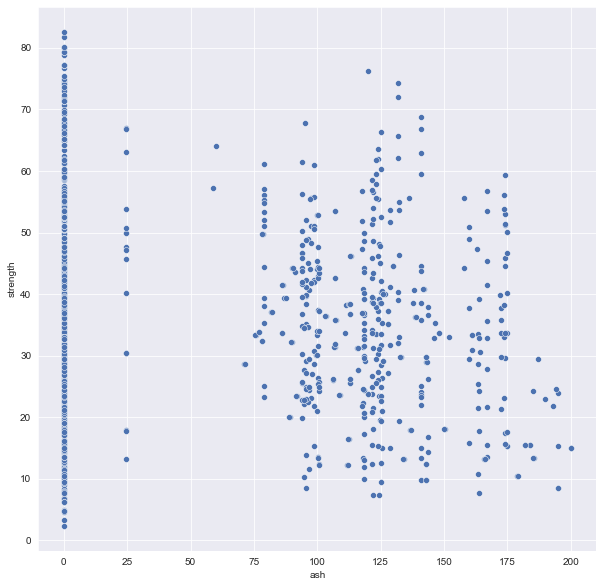

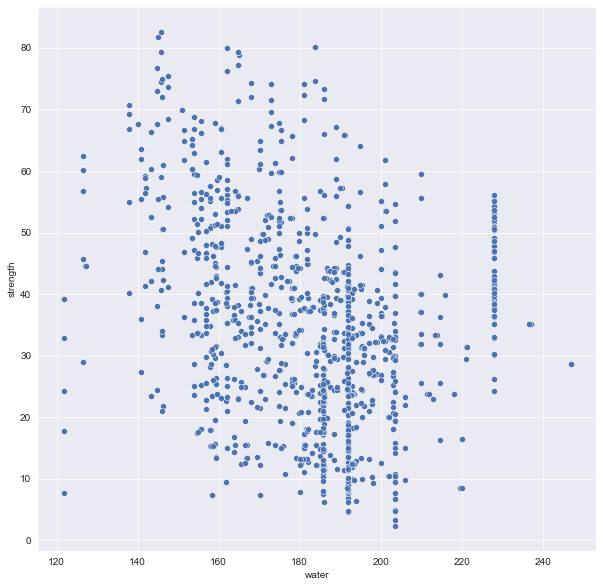

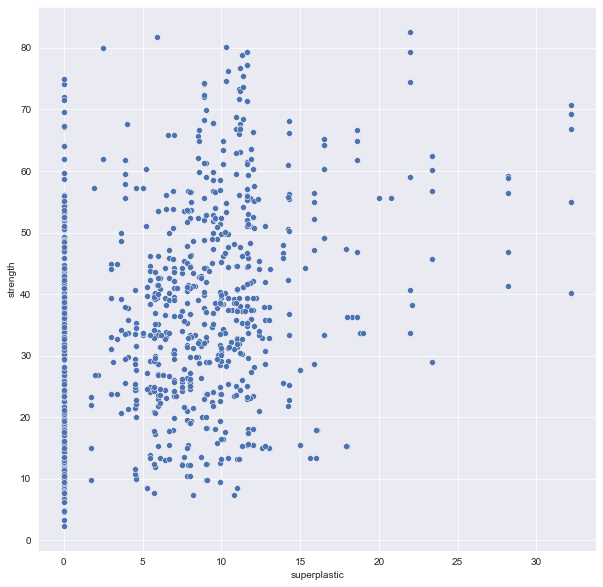

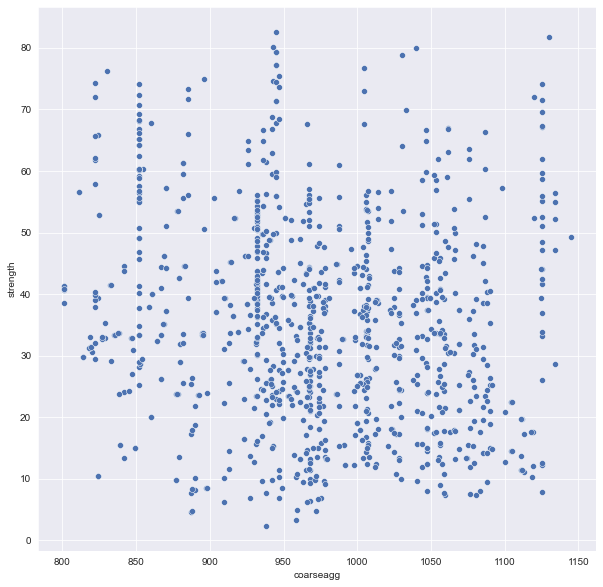

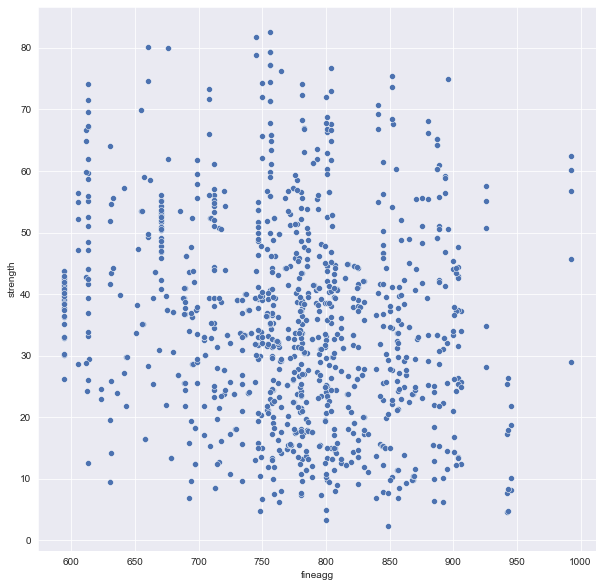

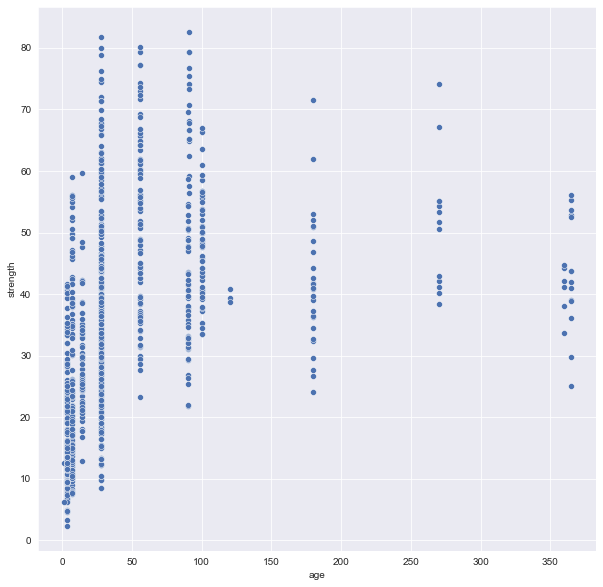

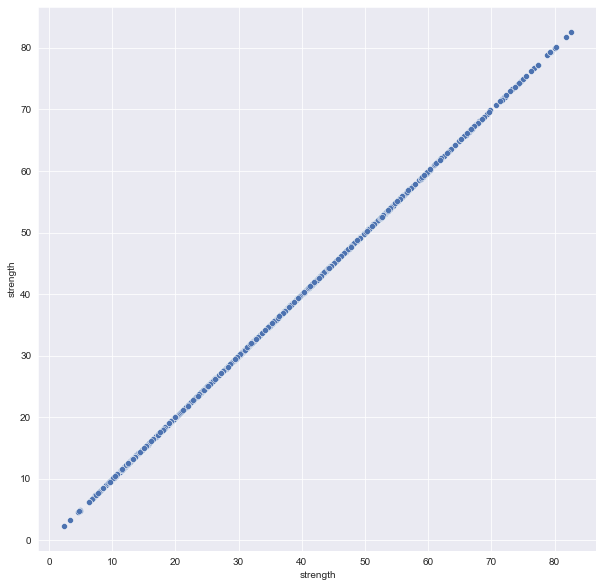

In [223]:
for i in df.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x = df[i], y = df['strength'])
    plt.show()  

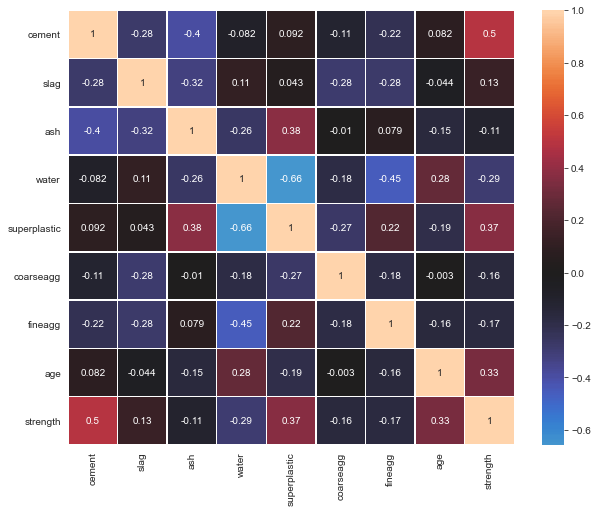

In [224]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0)
plt.show()

In [225]:
cor = df.corr()
cor

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

### Insigth
There are three variable with more corr with strength.

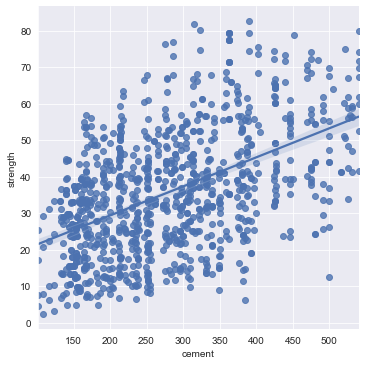

In [60]:
sns.lmplot(x="cement", y="strength", data=df)

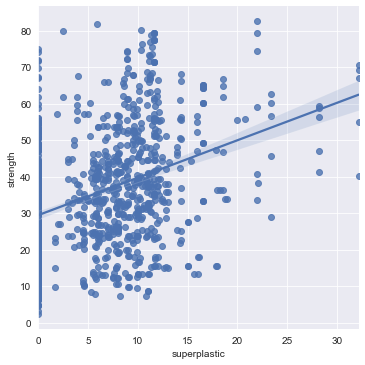

In [61]:
sns.lmplot(x="superplastic", y="strength", data=df)

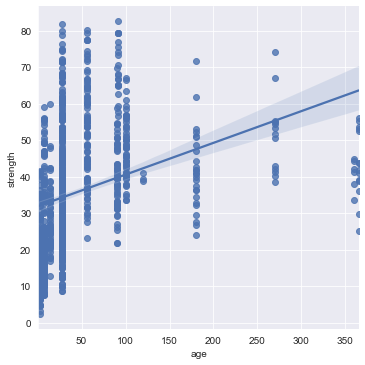

In [112]:
sns.lmplot(x="age", y="strength", data=df)

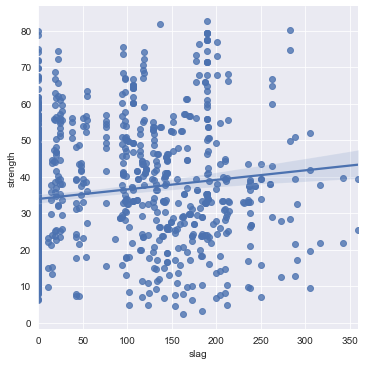

In [113]:
sns.lmplot(x="slag", y="strength", data=df)

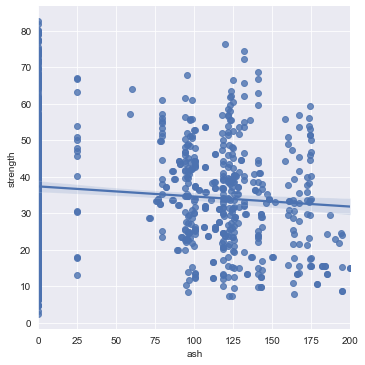

In [114]:
sns.lmplot(x="ash", y="strength", data=df)

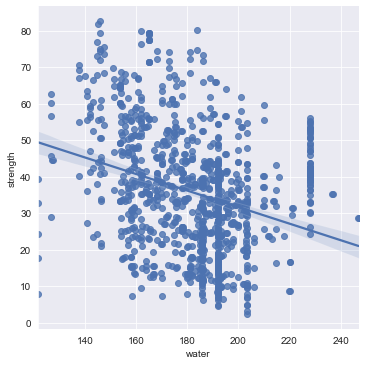

In [115]:
sns.lmplot(x="water", y="strength", data=df)

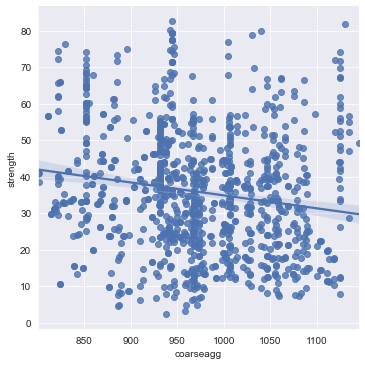

In [117]:
sns.lmplot(x="coarseagg", y="strength", data=df)

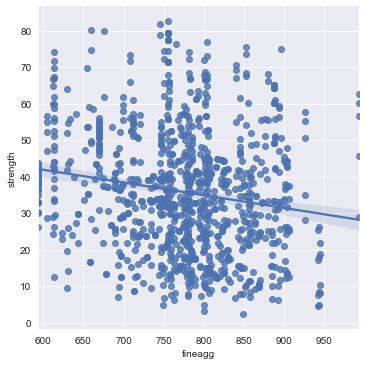

In [118]:
sns.lmplot(x="fineagg", y="strength", data=df)

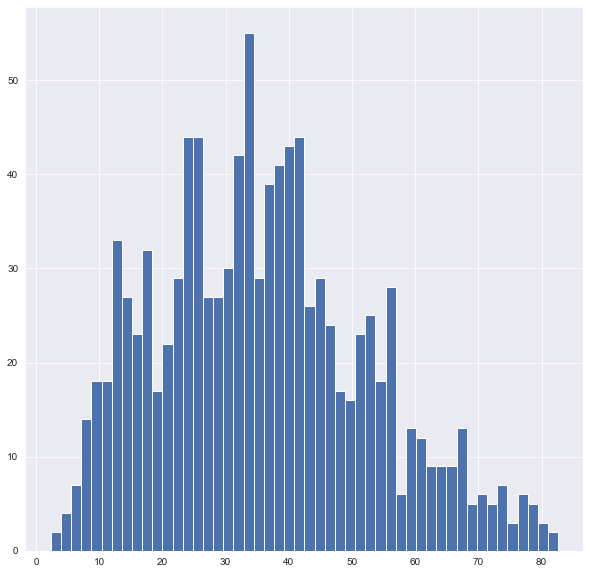

In [59]:
plt.hist(df['strength'], bins= 50) 
plt.show()

### Model using Lineal Regression

In [893]:
# X = df.drop('strength', axis=1) just testing another way to do the same thing
X = df.loc[:, df.columns != 'strength']
y = df['strength'].astype('float64')   

In [894]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [895]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [896]:
# Train R^2
print(regression_model.score(X_train, y_train))
# Test R^2
print(regression_model.score(X_test, y_test))

0.603148754063023
0.6339136715208276


In [897]:
# Train MSE
predicted_stre = regression_model.predict(X_train)
print(mean_squared_error(predicted_stre, y_train))
# Test MSE
predicted_stre = regression_model.predict(X_test)
print(mean_squared_error(predicted_stre, y_test))

108.5615435122796
106.54560359850504


In [898]:
coeff_data = pd.DataFrame()
coeff_data['Feature'] = X_train.columns
coeff_data['Coefs'] = regression_model.coef_
coeff_data.sort_values(by='Coefs',ascending=False)
coeff_data

Feature     Coefs
0        cement  0.126558
1          slag  0.108828
2           ash  0.090705
3         water -0.103157
4  superplastic  0.376123
5     coarseagg  0.024029
6       fineagg  0.036193
7           age  0.110435

## 3. Feature Engineering techniques and Tuning It


### Apply Ridge, Lasso, Prepocessing and Polynomial models
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Applying Preprocessing to the X

In [899]:
# Applying processing to standardize the dataset
# https://towardsdatascience.com/a-practical-suggestion-in-linear-regression-cb639fd5ccdb
# https://scikit-learn.org/stable/modules/preprocessing.html
# I created a new dataset for X feature that already have preprocessing method implemented
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 

In [900]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [901]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [902]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [13.13304305  9.3000219   5.72584423 -2.25989005  2.24591427  1.80860507
  2.82495919  6.96518176]


In [903]:
lasso = Lasso(alpha=.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [10.70062109  6.85087773  3.56776513 -3.98572226  2.10164572  0.
  0.58460205  6.70849752]


In [904]:
print(regression_model_fe.score(X_train, y_train))
print(regression_model_fe.score(X_test, y_test))

0.603148754063023
0.6339136715208273


In [905]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.603144790939098
0.6340333563625518


In [906]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5995642511109759
0.6347572367875216


### Insight
After standarization and regularized there is not significant diferrences. That means that the data do not have a lot of outliers.
After ridge there is no big differences in the score just like lasso.
For the three models our test score are higher in comparison with the train data, so we observed a case of underfitting.

### Applying Polynomial to the X

In [923]:
# Info considered into this feature engineering https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/
# To create new features i will considered degree 3 will add 2 new variables for each input variable. 
poly = PolynomialFeatures(degree = 3)

In [934]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 165)

In [937]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [938]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)

Ridge(alpha=0.3)

In [939]:
lasso = Lasso(alpha=.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [940]:
print(regression_model_po.score(X_train, y_train))
print(regression_model_po.score(X_test, y_test))

0.9311497733609706
0.8698207779994694


In [941]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9299702990565982
0.8676371345794341


In [942]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8952273174969179
0.8500275477751862


### Insight
After polynomial there are improvements in the model. For the three score the improvements is about 20% to 25% more and has achieved the goal of having at least 85% for the model score. Two models linear regression and ridge look a little overfitting.

### Applying Cross Validation

In [989]:
# Data without feature engineering applied
kfold = KFold(n_splits=10, random_state = 1)
cross_val = cross_val_score(regression_model, X, y, cv=kfold, scoring='r2').mean()
cross_val

0.5919104690705977

In [990]:
# Data with prepocessing applied
kfold = KFold(n_splits=10, random_state = 1)
cross_val = cross_val_score(regression_model, X_scaled, y, cv=kfold, scoring='r2').mean()
cross_val

0.5919104690705979

In [991]:
# Data with polynomial applied
kfold = KFold(n_splits=10, random_state = 1)
cross_val = cross_val_score(regression_model, X_poly, y, cv=kfold, scoring='r2').mean()
cross_val

0.8501179554850907

### Insight
After Cross Validation there are improvements in the model wiht polynomial achieved the goal of having at least 85% for the model score.

### Applying GridSearch

In [955]:
# I apply RFE to get an estimator for the model 
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
rfe = RFE(regression_model) 
rfe = rfe.fit(X_train, y_train)

In [964]:
# Tunning
params = [
    {'n_features_to_select': list(range(1,9))}
]
kfold = KFold(n_splits = 10, shuffle=True, random_state = 1)

grid_search = GridSearchCV(estimator = rfe, param_grid = params, scoring='r2', cv = kfold, verbose = 1, n_jobs= 1) 
grid_search

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()), n_jobs=1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='r2', verbose=1)

In [965]:
grid_search.fit(X_train, y_train)   

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   58.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()), n_jobs=1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='r2', verbose=1)

In [966]:
grid_search.best_params_

{'n_features_to_select': 8}

#### Print Grid with result

In [967]:
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.657844      0.252052         0.000808        0.000275   
1       0.524081      0.075041         0.000630        0.000079   
2       0.524235      0.047121         0.000636        0.000061   
3       0.475321      0.005161         0.000625        0.000032   
4       0.969076      0.274727         0.000867        0.000231   
5       1.537771      0.818836         0.000938        0.000245   
6       0.626713      0.233444         0.000806        0.000307   
7       0.544248      0.078290         0.000926        0.000710   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}           0.056308   
1                          2  {'n_features_to_select': 2}           0.069536   
2                          3  {'n_features_to_select': 3}           0.257251   
3                          4  {'n_features_to_select': 4}           0.462089   
4                          5  {'n_features_to_select': 5}           0.501242   
5                          6  {'n_features_to_select': 6}           0.546463   
6                          7  {'n_features_to_select': 7}           0.551005   
7                          8  {'n_features_to_select': 8}           0.656873   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.133022           0.059301           0.150099           0.123030   
1           0.146924           0.058475           0.109243           0.125587   
2           0.339054           0.282378           0.316463           0.292887   
3           0.592197           0.566288           0.509838           0.401703   
4           0.636339           0.715200           0.550450           0.413004   
5           0.677616           0.772240           0.611108           0.539625   
6           0.666676           0.765987           0.613258           0.540642   
7           0.715453           0.810959           0.598202           0.663827   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.171297           0.118839           0.152363          -0.069328   
1           0.176617           0.132484           0.152799          -0.112705   
2           0.327675           0.307858           0.264190           0.105131   
3           0.419703           0.462569           0.504569           0.319618   
4           0.503866           0.478531           0.542687           0.438681   
5           0.602913           0.613979           0.572091           0.415806   
6           0.660225           0.609133           0.583539           0.422999   
7           0.680942           0.655048           0.644603           0.568270   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.167985         0.106292        0.069838                7  
1           0.145445         0.100440        0.079129                8  
2           0.339639         0.283253        0.065449                6  
3           0.532319         0.477089        0.077649                5  
4           0.565215         0.534521        0.085679                4  
5           0.627250         0.597909        0.088281                3  
6           0.627696         0.604116        0.086026                2  
7           0.704707         0.669888        0.063121                1

### Applying RandomSearch

In [980]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# I considered new scenario without cv, verbose, nummer of jobs, just the default values
random_search = RandomizedSearchCV(estimator = rfe, param_distributions = params, scoring='r2', n_iter=10) 
random_search

RandomizedSearchCV(estimator=RFE(estimator=LinearRegression()),
                   param_distributions=[{'n_features_to_select': [1, 2, 3, 4, 5,
                                                                  6, 7, 8]}],
                   scoring='r2')

In [981]:
random_search.fit(X_train, y_train)   

RandomizedSearchCV(estimator=RFE(estimator=LinearRegression()),
                   param_distributions=[{'n_features_to_select': [1, 2, 3, 4, 5,
                                                                  6, 7, 8]}],
                   scoring='r2')

In [982]:
random_search.best_params_

{'n_features_to_select': 8}

In [983]:
random_results = pd.DataFrame(random_search.cv_results_)
random_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.515348      0.037146         0.000636        0.000073   
1       0.655230      0.402001         0.000648        0.000059   
2       0.692992      0.083254         0.001515        0.001176   
3       1.753314      0.981210         0.001089        0.000885   
4       0.480375      0.021563         0.000623        0.000013   
5       0.504195      0.043396         0.000720        0.000193   
6       0.576012      0.098601         0.000821        0.000121   
7       0.492816      0.046465         0.000747        0.000155   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}           0.159872   
1                          2  {'n_features_to_select': 2}           0.159955   
2                          3  {'n_features_to_select': 3}           0.305481   
3                          4  {'n_features_to_select': 4}           0.494075   
4                          5  {'n_features_to_select': 5}           0.581991   
5                          6  {'n_features_to_select': 6}           0.650943   
6                          7  {'n_features_to_select': 7}           0.651257   
7                          8  {'n_features_to_select': 8}           0.669484   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.124795           0.095686           0.136095           0.101405   
1           0.133129           0.093826           0.133961           0.099528   
2           0.259326           0.359410           0.252347           0.322111   
3           0.460342           0.515070           0.477408           0.509402   
4           0.551950           0.548466           0.583896           0.597586   
5           0.591063           0.586739           0.625162           0.620875   
6           0.596659           0.593292           0.633669           0.609027   
7           0.683330           0.725434           0.657251           0.681272   

   mean_test_score  std_test_score  rank_test_score  
0         0.123571        0.023431                8  
1         0.124080        0.024432                7  
2         0.299735        0.039933                6  
3         0.491259        0.020257                5  
4         0.572778        0.019229                4  
5         0.614957        0.023670                3  
6         0.616781        0.022319                2  
7         0.683354        0.023016                1

### Insight
After GridSearch and RandomizedSearch there are an small improvements in the test score. For GridSearch 66% an for RandomizedSearchCV 68%

# Results

In [988]:
grid = pd.DataFrame({'Method':['LinearRegression', 'LinearRegression/Preprocessing', 'LinearRegression/Preprocessing/Ridge', 'LinearRegression/Preprocessing/Lasso', 'LinearRegression/Polynomial', 'LinearRegression/Polynomial/Ridge', 'LinearRegression/Polynomial/Lasso', 'LinearRegression/Cross Validation', 'LinearRegression/Cross Validation/Preprocessing', 'LinearRegression/Cross Validation/Polynomial', 'LinearRegression/GridSearchCV', 'LinearRegression/RandomizedSearch'], 'score': [0.63, 0.63, 0.63, 0.63, 0.86, 0.86, 0.85, 0.59, 0.59, 0.85, 0.66, 0.68]})
grid = grid[['Method', 'score']]
grid

Method  score
0                                  LinearRegression   0.63
1                    LinearRegression/Preprocessing   0.63
2              LinearRegression/Preprocessing/Ridge   0.63
3              LinearRegression/Preprocessing/Lasso   0.63
4                       LinearRegression/Polynomial   0.86
5                 LinearRegression/Polynomial/Ridge   0.86
6                 LinearRegression/Polynomial/Lasso   0.85
7                 LinearRegression/Cross Validation   0.59
8   LinearRegression/Cross Validation/Preprocessing   0.59
9      LinearRegression/Cross Validation/Polynomial   0.85
10                    LinearRegression/GridSearchCV   0.66
11                LinearRegression/RandomizedSearch   0.68

### Insight

The models that meets the requirements is Linear Regression and Cross Validation with Polynomial Features Transformation applied.